<a href="https://colab.research.google.com/github/Manujk-123/Marvel-Task-Level-1/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detecting breast cancer using Support Vector Machines (SVM)**
Detecting breast cancer using Support Vector Machines (SVM) involves several key steps. Here’s a concise outline of how you can approach this problem:

####**1. Data Collection**</br>
- Obtain a dataset related to breast cancer. Commonly used datasets include the Wisconsin Breast Cancer Dataset (WBCD), which contains features like radius, texture, perimeter, area, smoothness, etc.

####**2. Data Preprocessing**</br>
- **Cleaning:** Handle missing values and remove duplicates.
- **Normalization:** Scale features to ensure they are on a similar scale, which is important for SVM performance.
- **Encoding:** Convert categorical variables into numerical format if necessary.

####**3. Feature Selection**</br>
- Identify which features contribute most to the prediction. Techniques like Recursive Feature Elimination (RFE) or feature importance from tree-based models can help.

####**4. Model Training**</br>
- Split the dataset into training and testing sets (commonly 70/30 or 80/20).
- Choose an SVM implementation (e.g., from libraries like scikit-learn in Python).
- Train the model using the training set.

####**5. Hyperparameter Tuning**</br>
- Optimize parameters such as the kernel type (linear, polynomial, RBF), regularization parameter (C), and others using techniques like Grid Search or Random Search.

####**6. Model Evaluation**</br>
- Evaluate the model using the testing set. Common metrics include:

  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC

####**7. Model Deployment**
- If the model shows satisfactory performance, it can be deployed for real-time prediction. Ensure to monitor and retrain the model with new data periodically.

In [ ]:
pip install pandas scikit-learn


[[71  0]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



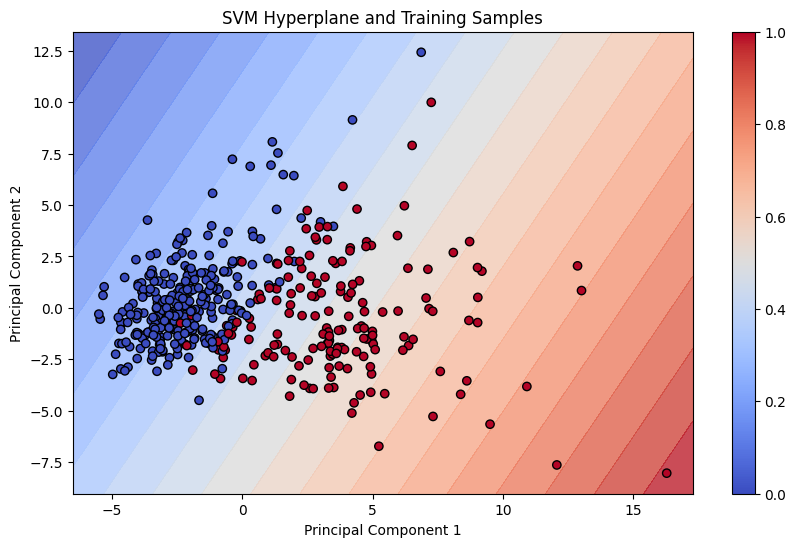

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Preprocessing
X = data.drop('diagnosis', axis=1)  # Adjust this if needed
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Adjust based on your dataset

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM model
model = SVC(kernel='linear', C=1)
model.fit(X_train_pca, y_train)

# Predictions
y_pred = model.predict(X_test_pca)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plotting the hyperplane
def plot_hyperplane(X, y, model):
    # Create grid to plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict the function value for the whole grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

    plt.title('SVM Hyperplane and Training Samples')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

# Plot hyperplane with training data
plot_hyperplane(X_train_pca, y_train, model)
